In [6]:
import numpy as np
from tensorflow.keras import datasets, utils

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [8]:
from tensorflow.keras import layers, models
input_layer = layers.Input((32,32,3))

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate = 0.5)(x)

output_layer = layers.Dense(10, activation = 'softmax')(x)
model = models.Model(input_layer, output_layer)

In [9]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt,
              metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 32
          , epochs = 10
          , shuffle = True
         )
model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5635 - accuracy: 0.4508
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1553 - accuracy: 0.5946
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0063 - accuracy: 0.6505
Epoch 4/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9202 - accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8566 - accuracy: 0.6991
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8006 - accuracy: 0.7198
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7618 - accuracy: 0.7351
Epoch 8/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7220 - accuracy: 0.7502
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6842 - accuracy: 0.7609
Epoch 10/10
313/313 [==============================] - 5s 14ms/s

[0.8851131796836853, 0.7002000212669373]

In [11]:
# Display output
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 4s 13ms/step


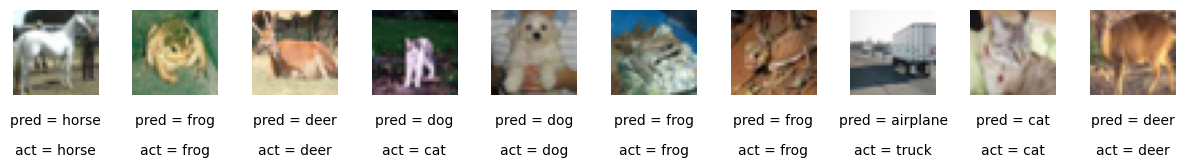

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)